In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split

data = pd.read_csv('neuralnet.csv')
cols = ['rank', 'gender', 'race',
       'current_age', 'years_service', 'salary', 'numAllegations',
       'numSettlements', 'sum_settlement_amount', 'numAwards']
df = data[cols]

#drop null rows
df = df.dropna()

#one hot encoding categorical variables
df = pd.get_dummies(df,prefix=['rank','gender','race'],columns=['rank','gender','race'])

ucols = ['current_age', 'years_service', 'salary', 'numAllegations',
       'numSettlements', 'sum_settlement_amount', 'numAwards', 'rank_Captain',
       'rank_Chief', 'rank_Civilian', 'rank_Commander', 'rank_Deputy Chief',
       'rank_Detective', 'rank_Field Training Officer', 'rank_Lieutenant',
       'rank_Police Officer', 'rank_Sergeant', 'gender_F', 'gender_M',
       'race_Asian/Pacific', 'race_Black', 'race_Hispanic',
       'race_Native American/Alaskan Native', 'race_Unknown', 'race_White']

df = df[ucols]

col = ['current_age', 'years_service', 'numAllegations',
       'numSettlements', 'sum_settlement_amount', 'numAwards', 'rank_Captain',
       'rank_Chief', 'rank_Civilian', 'rank_Commander', 'rank_Deputy Chief',
       'rank_Detective', 'rank_Field Training Officer', 'rank_Lieutenant',
       'rank_Police Officer', 'rank_Sergeant', 'gender_F', 'gender_M',
       'race_Asian/Pacific', 'race_Black', 'race_Hispanic',
       'race_Native American/Alaskan Native', 'race_Unknown', 'race_White']
X = df[col]
y = df['salary']

#normalize data
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean)/std

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


def build_model():
    model = keras.Sequential([
        keras.layers.Dense(128,activation=tf.nn.relu,input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64,activation=tf.nn.relu),
        keras.layers.Dense(32,activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])
    
    model.compile(loss='mse',optimizer='adam',metrics=['mae'])
    
    return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3200      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 13,569
Trainable params: 13,569
Non-trainable params: 0
_________________________________________________________________


<Figure size 432x288 with 0 Axes>

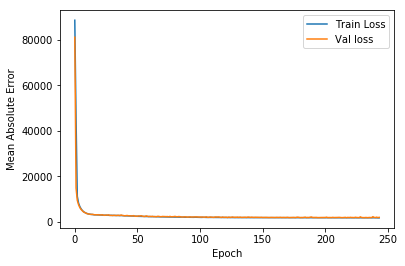

In [2]:
#store trained data stats 
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2, verbose=0, callbacks=[early_stop])

plt.gcf().clf()
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
       label='Train Loss')
plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
       label = 'Val loss')
plt.legend()
plt.show()


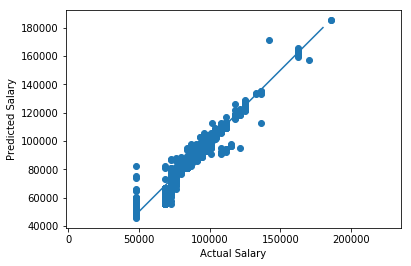

In [3]:
#predict salaries for test data
pred = model.predict(X_test)

x = np.linspace(50000,180000,10)
plt.scatter(y_test,pred)
plt.plot(x,x)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.axis('equal')
plt.show()


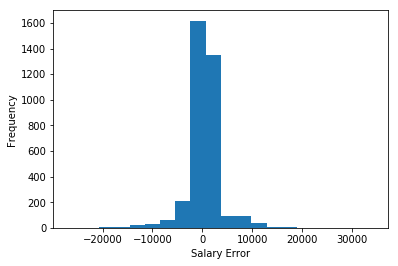

In [4]:
err = pred.flatten() - y_test
plt.hist(err,bins=20)
plt.xlabel('Salary Error')
plt.ylabel('Frequency')
plt.show()

In [5]:
[loss, mae] = model.evaluate(X_test, y_test, verbose=0)
print('Mean Absolute Error = ',mae)

Mean Absolute Error =  2017.9073953453283
